# Stock Market Performance Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

df= pd.read_csv(r'C:\Users\sumo5\Downloads\stocks.csv')
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [2]:
!pip install yfinance pandas_datareader

     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     --- --------------------------------- 30.7/314.6 kB 435.7 kB/s eta 0:00:01
     ------------ ----------------------- 112.6/314.6 kB 939.4 kB/s eta 0:00:01
     -------------------------------------  307.2/314.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 314.6/314.6 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ----- ---------------------------------- 0.4/3.0 MB 8.9 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 

In [5]:
import yfinance as yf
stock = yf.Ticker("AAPL")  # Using Apple's stock symbol
data = stock.history(period="1y")  # Fetching data for 1 year


                                 Open        High         Low       Close  \
Date                                                                        
2023-03-29 00:00:00-04:00  158.523867  160.194955  158.503984  159.916443   
2023-03-30 00:00:00-04:00  160.672391  161.607402  160.413777  161.497986   
2023-03-31 00:00:00-04:00  161.577560  164.123965  161.050375  164.024490   
2023-04-03 00:00:00-04:00  163.397844  165.407108  163.348106  165.287750   
2023-04-04 00:00:00-04:00  165.715477  165.954193  164.233382  164.750626   
...                               ...         ...         ...         ...   
2024-03-22 00:00:00-04:00  171.759995  173.050003  170.059998  172.279999   
2024-03-25 00:00:00-04:00  170.570007  171.940002  169.449997  170.850006   
2024-03-26 00:00:00-04:00  170.000000  171.419998  169.580002  169.710007   
2024-03-27 00:00:00-04:00  170.410004  173.600006  170.110001  173.309998   
2024-03-28 00:00:00-04:00  171.750000  172.229996  170.509995  171.479996   

In [6]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
data.dropna(inplace= True)

In [9]:
df.head(2)
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
df.index= pd.to_datetime(df.index)

#### Calculate daily returns:

In [11]:
data.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-29 00:00:00-04:00,158.523867,160.194955,158.503984,159.916443,51305700,0.0,0.0
2023-03-30 00:00:00-04:00,160.672391,161.607402,160.413777,161.497986,49501700,0.0,0.0


In [15]:
data['Daily_returns']= data['Close'].pct_change()


### Exploratory Data Analysis (EDA)

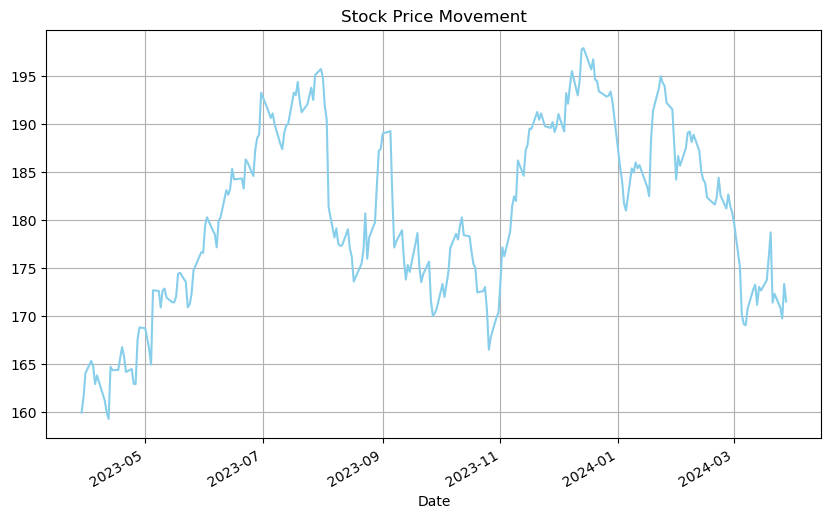

In [21]:
data['Close'].plot(figsize=(10, 6), title="Stock Price Movement", color='skyblue')
plt.grid(True)
plt.show()


#### Analyze volume of stocks traded:

In [22]:
data.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_returns
Date,,,,,,,,
2023-03-29 00:00:00-04:00,158.523867,160.194955,158.503984,159.916443,51305700,0.0,0.0,NaN
2023-03-30 00:00:00-04:00,160.672391,161.607402,160.413777,161.497986,49501700,0.0,0.0,0.00989


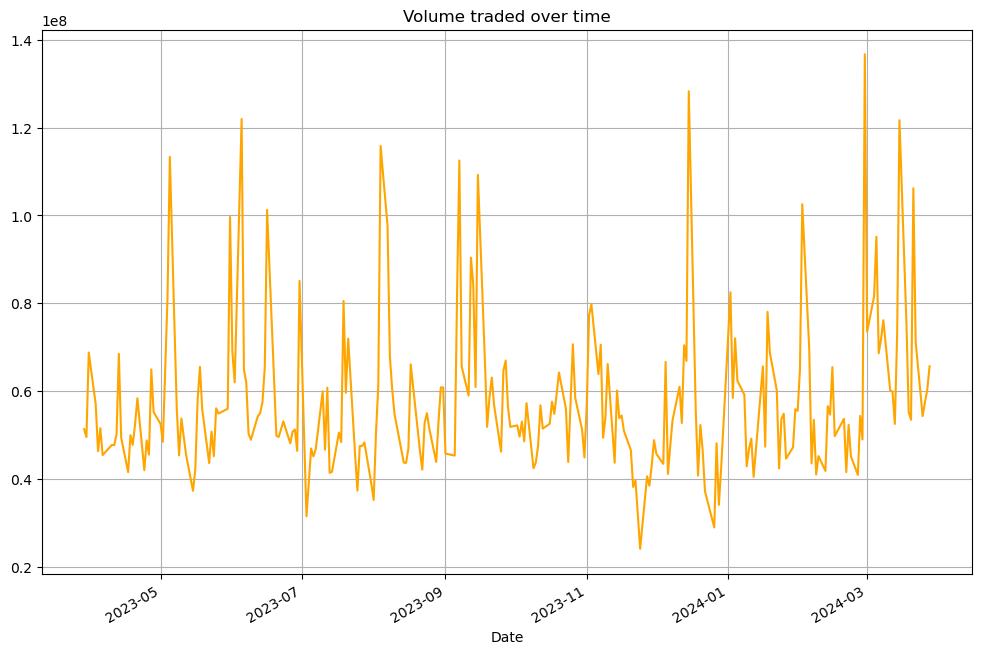

In [28]:
data['Volume'].plot(figsize=(12,8), title='Volume traded over time', color='orange')
plt.grid(True)
plt.show()

#### Correlation between stocks:

In [50]:
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

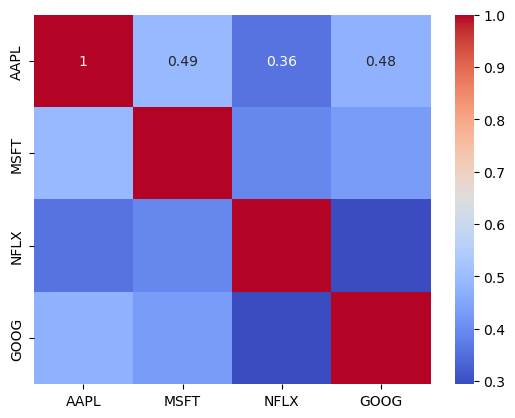

In [56]:
import seaborn as sns

stock_list = ['AAPL', 'MSFT', 'NFLX', 'GOOG']
close_prices= pd.DataFrame()

for stock in stock_list:
    close_prices[stock]= yf.Ticker(stock).history(period='1y')['Close']

correlation= close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

#### Technical Analysis

Simple Moving Average (SMA):

In [57]:
df.head(2)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
1970-01-01 00:00:00.000000000,AAPL,<function to_datetime at 0x00000143DC7F47C0>,150.639999,155.229996,150.639999,154.649994,154.41423,83322600
1970-01-01 00:00:00.000000001,AAPL,<function to_datetime at 0x00000143DC7F47C0>,153.880005,154.580002,151.169998,151.919998,151.68840,64120100


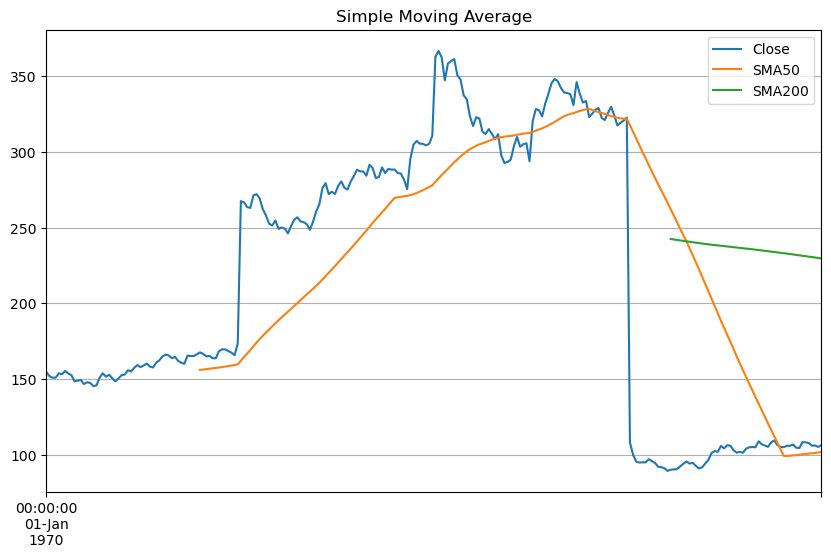

In [59]:
df['SMA50']= df['Close'].rolling(window= 50).mean()
df['SMA200']= df['Close'].rolling(window= 200).mean()

df[['Close', 'SMA50', 'SMA200']].plot(figsize=(10,6))
plt.title('Simple Moving Average')
plt.grid(True)
plt.show()


Exponential Moving Average (EMA):

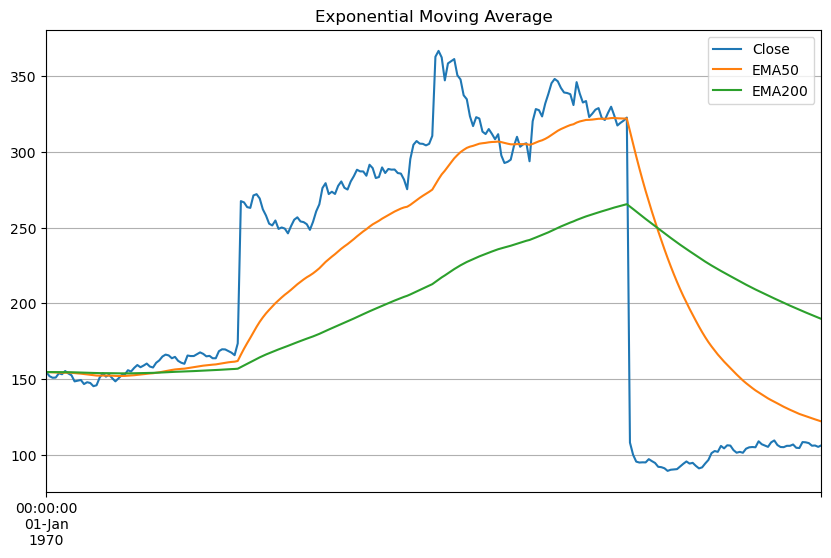

In [61]:
df['EMA50']= df['Close'].ewm(span= 50, adjust = False).mean()
df['EMA200']= df['Close'].ewm(span= 200, adjust = False).mean()

df[['Close', 'EMA50', 'EMA200']].plot(figsize=(10,6))
plt.title('Exponential Moving Average')
plt.grid(True)
plt.show()

####  Bollinger Bands:

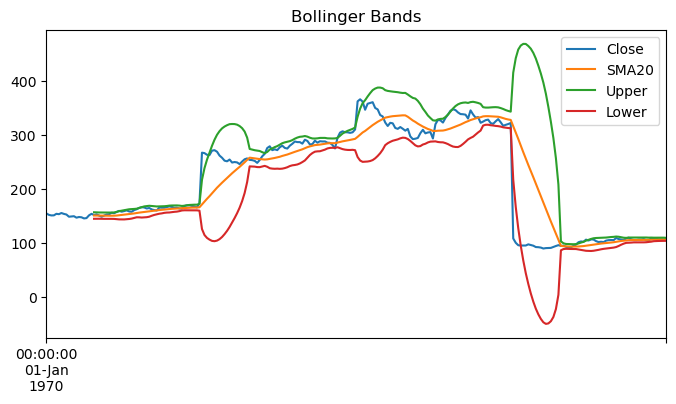

In [64]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['SMA20'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['SMA20'] - 2*df['Close'].rolling(window=20).std()

df[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(8,4))
plt.title('Bollinger Bands')
plt.show()